In [7]:
from src.model import TrofeoAmicizia

baseline_kwargs = dict(
    participants=205,
    participation_price=10,
    participation_medal_price=1.4,
    gadget_price=1.2,
    categories=11,
    podiums_for_speciality_each_category=5,
    average_podium_medal_price=1.85,
    average_cup_price=9,
    available_coaches=14,
    coaches_for_round={1: 13, 2: 13, 3: 13, 4:14, 5:14, 6:0},
    coaches_salary_for_round=7,
    judges_for_round={1: 0, 2: 0, 3: 0, 4:1, 5:0, 6:0},
    judges_salary_for_round=10,
    food_cost=30,
    photos_per_atlete=1.5,
    profit_per_photo=0.55,
)
base_trofeo = TrofeoAmicizia(**baseline_kwargs)

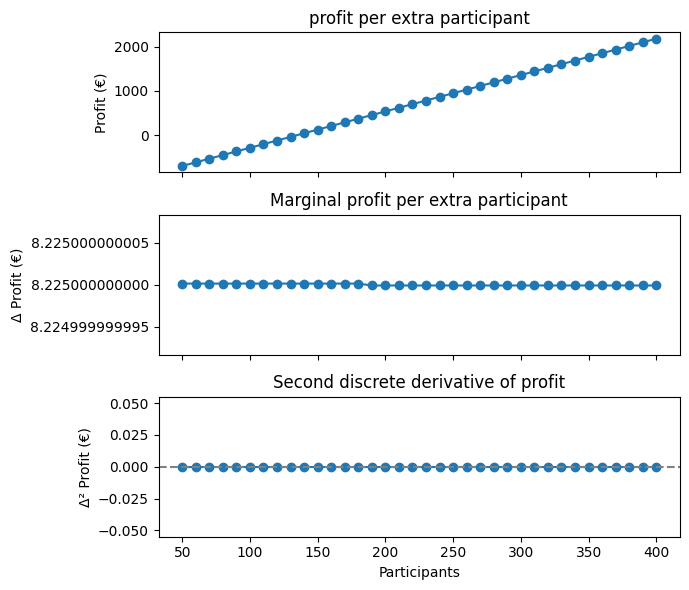

In [8]:
from dataclasses import replace
# %
# PROFIT AS A FUNCTION OF PARTICIPANTS
# %
# 1. setup baseline event ----------------------------------
import pandas as pd
import matplotlib.pyplot as plt

# %%
# sweep participants and compute  --------------------------
records = []
for n in range(50, 401, 10):   # da 50 a 400 partecipanti
    ev = replace(base_trofeo, **{"participants": n})
    records.append(
        dict(
            participants=n,
            profit=ev.profit,
            d_profit=ev.dprofit_dparticipants(),
            d2_profit=ev.d2profit_dparticipants2()
        )
    )

df = pd.DataFrame(records)
df.head()      # mostra le prime righe

# %%
# plot ----------------------------------------------
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 6), sharex=True)

ax1.plot(df["participants"], df["profit"], marker="o")
ax1.set_ylabel("Profit (€)")
ax1.set_title("profit per extra participant")
ax1.ticklabel_format(style="plain", useOffset=False)

ax2.plot(df["participants"], df["d_profit"], marker="o")
ax2.set_ylabel("Δ Profit (€)")
ax2.set_title("Marginal profit per extra participant")
ax2.ticklabel_format(style="plain", useOffset=False)

ax3.plot(df["participants"], df["d2_profit"].round(2), marker="o")
ax3.axhline(0, color="grey", linestyle="--")
ax3.set_xlabel("Participants")
ax3.set_ylabel("Δ² Profit (€)")
ax3.set_title("Second discrete derivative of profit")
ax3.ticklabel_format(style="plain", useOffset=False)


plt.tight_layout()
plt.show()

In [9]:
import numpy as np
from scipy.optimize import minimize_scalar

# PROFIT VARING THE PARTICIPATION PRICE
print(f"Utile stimato: €{base_trofeo.profit:.2f}")

Utile stimato: €574.88


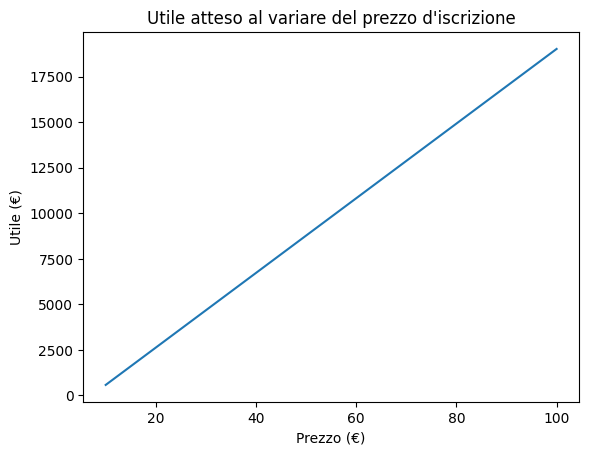

In [10]:
import matplotlib.pyplot as plt

prezzi = np.linspace(10, 100, 10)

utili = [replace(base_trofeo, **{"participation_price": p}).profit for p in prezzi]

plt.plot(prezzi, utili)
plt.title("Utile atteso al variare del prezzo d'iscrizione")
plt.xlabel("Prezzo (€)")
plt.ylabel("Utile (€)")
plt.show()